In [1]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics.yolo.utils.plotting import Annotator
from ultralytics.yolo.utils.benchmarks import benchmark
import yaml
import ultralytics

In [2]:
# check if YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.131  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (24 CPUs, 15.7 GB RAM, 83.9/280.0 GB disk)


In [3]:
# model = YOLO('yolov8n-pose.pt')
model = YOLO(r'D:\CMC\DeepVision\ipy_notebooks\runs\pose\train4\weights\last.pt')

Create yaml file

In [5]:
myDict = {"path":"../dataset/multi_class/dataset_processed/dataset.yaml",
          "train":"../dataset/multi_class/dataset_processed/images/train",
          "val":"../dataset/multi_class/dataset_processed/images/val",
          "test":"../dataset/multi_class/dataset_processed/images/test",
          "kpt_shape":[5, 2],
          'names': {0: '0',
                    1: "49",
                    2: "80"}
          }

# with open("../dataset/multi_class/dataset_processed/dataset.yaml", 'w') as file:
#     documents = yaml.dump(myDict, file)

In [6]:
# model.train(data='../dataset/multi_class/dataset.yaml', epochs=160, plots=True, workers=0, batch=48, int8=True)
model.train(resume=True, workers=0)

New https://pypi.org/project/ultralytics/8.0.135 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.131  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
yolo\engine\trainer: task=pose, mode=train, model=D:\CMC\DeepVision\ipy_notebooks\runs\pose\train4\weights\last.pt, data=../dataset/multi_class/dataset.yaml, epochs=160, patience=50, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

Resuming training from D:\CMC\DeepVision\ipy_notebooks\runs\pose\train4\weights\last.pt from epoch 123 to 160 total epochs
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\pose\train4
Starting training for 160 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size
    123/160      7.01G     0.2211      0.038          0     0.1883     0.7676        140        640: 100%|██████████| 186/186 [04:15<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:27<00:00,  2.49s/it]
                   all       1051       1854      0.961      0.971      0.989      0.985      0.961      0.971      0.989      0.989

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size
    124/160      6.99G     0.2243    0.03522          0     0.1921     0.7687  

In [3]:
# model = YOLO(r"C:\Users\CMC\Documents\openposelibs\pose\DeepVision\models\kaggle_aruco_multiclass.pt")
# model = YOLO(r"C:\Users\CMC\Documents\openposelibs\pose\DeepVision\models\kaggle_aruco_multiclass.pt")

In [20]:
result = model.predict(r"D:\CMC\DeepVision\dataset\multi_class\dataset_processed\images\test\image_620.png", verbose = True, int8=True)
# cl = model.predict(r"C:\Users\CMC\Documents\openposelibs\pose\DeepVision\dataset\multi_class\dataset_processed\images\test\image_502.png", verbose = True, classes = [0])


image 1/1 D:\CMC\DeepVision\dataset\multi_class\dataset_processed\images\test\image_620.png: 384x640 1 0, 62.5ms
Speed: 3.5ms preprocess, 62.5ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
result[0].boxes

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[674.0000, 513.0000, 742.0000, 584.0000,   0.9874,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.9874], device='cuda:0')
data: tensor([[674.0000, 513.0000, 742.0000, 584.0000,   0.9874,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[708.0000, 548.5000,  68.0000,  71.0000]], device='cuda:0')
xywhn: tensor([[0.5531, 0.7618, 0.0531, 0.0986]], device='cuda:0')
xyxy: tensor([[674., 513., 742., 584.]], device='cuda:0')
xyxyn: tensor([[0.5266, 0.7125, 0.5797, 0.8111]], device='cuda:0')

In [10]:
result[0].keypoints

ultralytics.yolo.engine.results.Keypoints object with attributes:

conf: None
data: tensor([[[981.1640, 566.3891],
         [944.6913, 566.5195],
         [939.0640, 509.7968],
         [976.2172, 511.6520],
         [981.1642, 566.3855]],

        [[681.1834, 578.9495],
         [679.9777, 518.6367],
         [708.6354, 517.3520],
         [709.8019, 578.3043],
         [681.1832, 578.9473]]])
has_visible: False
orig_shape: (720, 1280)
shape: torch.Size([2, 5, 2])
xy: tensor([[[981.1640, 566.3891],
         [944.6913, 566.5195],
         [939.0640, 509.7968],
         [976.2172, 511.6520],
         [981.1642, 566.3855]],

        [[681.1834, 578.9495],
         [679.9777, 518.6367],
         [708.6354, 517.3520],
         [709.8019, 578.3043],
         [681.1832, 578.9473]]])
xyn: tensor([[[0.7665, 0.7867],
         [0.7380, 0.7868],
         [0.7336, 0.7081],
         [0.7627, 0.7106],
         [0.7665, 0.7866]],

        [[0.5322, 0.8041],
         [0.5312, 0.7203],
         [0.5536

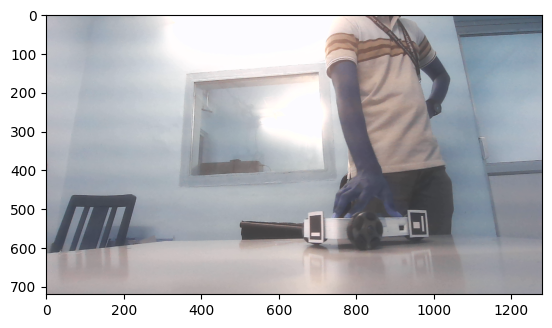

In [11]:
plt.imshow(result[0].orig_img)